In [100]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
#create 50 random x and y number
np.random.seed(42)
n=50
x=np.random.randn(n)
y=x*np.random.randn(n)

In [102]:
print(x)
print("===============================================")
print(y)

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016]
[ 1.60977094e-01  5.32431324e-02 -4.38434621e-01  9.31601250e-01
 -2.41412018e-01 -2.18047093e-01 -1.32530307e+00 -2.37300316e-01
 -1.55519696e-01  5.29291807e-01  2.22057820e-01  8.64669094e-02
 -2.67691323e-01  2.28867850e+00 -1.40154028e+00 -7.62596855e-01
  7.29340921e-02  3.15357536e-01 -3.28374217e-01  9.11105017e-01
  5.29679024e-01 -3.47252206e-01 -2.41926810e-03 -2.22922321e+00


In [103]:
x.shape

(50,)

In [104]:
y.shape

(50,)

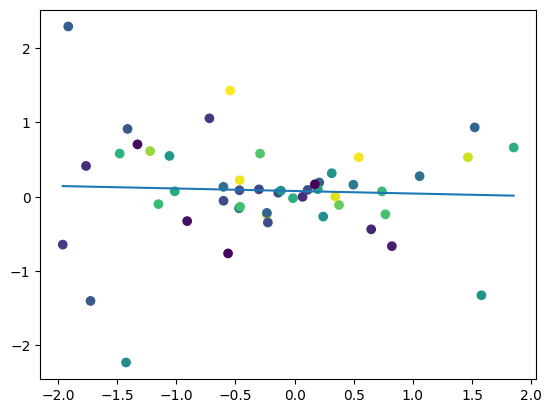

In [105]:
colors=np.random.rand(n)
plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.scatter(x,y,c=colors)
plt.show()

# build a toy dataset

In [106]:
x_values=[i for i in range(11)]
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [107]:
#Convert list of numbers to numpy array
x_train=np.array(x_values,dtype=np.float32)
print(x_train)

print("===================================")
print("shape :",x_train.shape)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
shape : (11,)


In [108]:
# Convert to 2-dimensional array
x_train=x_train.reshape(-1,1)
x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

In [109]:
x_train.shape

(11, 1)

In [110]:
# Create list of y values
y_values=[2*i+1 for i in x_values]
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [111]:
# Convert to numpy array
y_train=np.array(y_values,dtype=np.float32)
print(y_train)

[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19. 21.]


In [112]:
# Reshape y numpy array to 2-dimension

y_train=y_train.reshape(-1,1)
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [113]:
y_train.shape

(11, 1)

#  Create Model

In [114]:
class LinearRegressionModel(nn.Module):
  def __init__(self,input_dim,output_dim):
    super(LinearRegressionModel,self).__init__()
    self.linear_layer=nn.Linear(input_dim,output_dim)

  def forward(self,x):
    out=self.linear_layer(x)
    return out
input_dim=1
output_dim=1
model=LinearRegressionModel(input_dim,output_dim)
model

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [115]:
loss0= nn.L1Loss()
optimizer=torch.optim.Adam(params=model.parameters(), lr=0.1)

In [116]:
torch.manual_seed(42)


# train Model

In [117]:
epochs=100
for epoch in range(epochs):
  epoch+=1
  input=torch.from_numpy(x_train).requires_grad_()
  label=torch.from_numpy(y_train)
  optimizer.zero_grad()
  output=model(input)
  loss=loss0(output,label)
  loss.backward()
  optimizer.step()
  print(f"Epoch : {epoch} | Loss : {loss.item()}")

Epoch : 1 | Loss : 6.347299575805664
Epoch : 2 | Loss : 5.747299671173096
Epoch : 3 | Loss : 5.1527557373046875
Epoch : 4 | Loss : 4.571832656860352
Epoch : 5 | Loss : 3.991267204284668
Epoch : 6 | Loss : 3.4108710289001465
Epoch : 7 | Loss : 2.830561637878418
Epoch : 8 | Loss : 2.250295400619507
Epoch : 9 | Loss : 1.7035980224609375
Epoch : 10 | Loss : 1.169494390487671
Epoch : 11 | Loss : 0.7033745646476746
Epoch : 12 | Loss : 0.4086090326309204
Epoch : 13 | Loss : 0.7369705438613892
Epoch : 14 | Loss : 1.1035429239273071
Epoch : 15 | Loss : 1.3349381685256958
Epoch : 16 | Loss : 1.4537702798843384
Epoch : 17 | Loss : 1.4779056310653687
Epoch : 18 | Loss : 1.4216951131820679
Epoch : 19 | Loss : 1.2968266010284424
Epoch : 20 | Loss : 1.1129348278045654
Epoch : 21 | Loss : 0.8780364990234375
Epoch : 22 | Loss : 0.5988662838935852
Epoch : 23 | Loss : 0.33113986253738403
Epoch : 24 | Loss : 0.39173391461372375
Epoch : 25 | Loss : 0.5335368514060974
Epoch : 26 | Loss : 0.6501497626304626


In [118]:
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 0.97844243],
       [ 2.9698102 ],
       [ 4.961178  ],
       [ 6.952546  ],
       [ 8.943913  ],
       [10.935281  ],
       [12.926649  ],
       [14.918017  ],
       [16.909386  ],
       [18.900753  ],
       [20.89212   ]], dtype=float32)

In [119]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

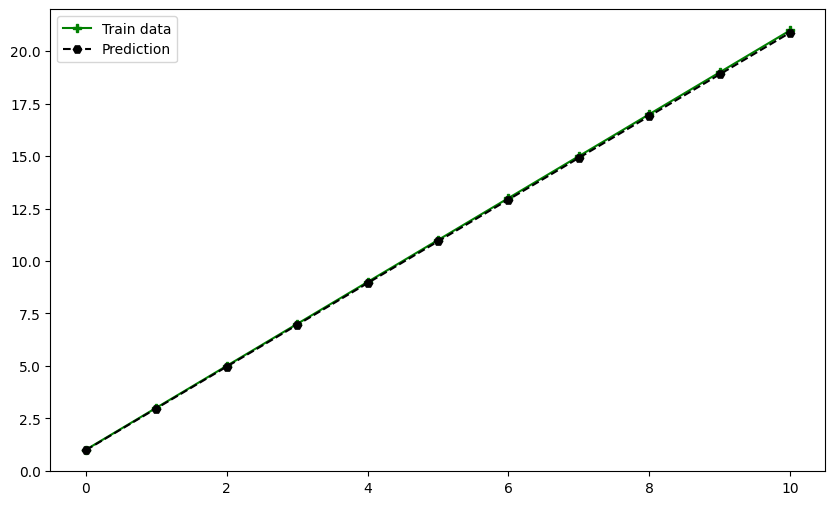

In [120]:
plt.figure(figsize=(10,6))
plt.plot(x_train,y_train,color="green",marker="P",label="Train data")
plt.plot(x_train,predicted,color="black",marker="H",linestyle="--",label="Prediction")
plt.legend(loc="best")
plt.show()